# Week 1 - Pythangorean Expectation & English Football

In [1]:
# %load ./imports.py
# %load /Users/bartev/dev/github-bv/sporty/notebooks/imports.py

## Where am I
!echo $VIRTUAL_ENV

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# magics
%load_ext blackcellmagic
# start cell with `%%black` to format using `black`

%load_ext autoreload
# start cell with `%autoreload` to reload module
# https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html

# reload all modules when running
%autoreload 2

# imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

from importlib import reload
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# https://plotnine.readthedocs.io/en/stable/

import plotnine as p9
from plotnine import ggplot, aes, facet_wrap

from src.utils import lower_case_col_names


/Users/bartev/.venvs/sport


# Read data

Download from https://fbref.com/en/comps/9/1631/2017-2018-Premier-League-Stats

In [2]:
data_dir = Path('../data/raw/wk1-english-football/')

data = pd.read_csv(data_dir / 'season-1718.csv').pipe(lower_case_col_names)
data = pd.read_csv(data_dir / 'england.csv')

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
data

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1888-09-08,1888,Bolton Wanderers,Derby County,3-6,3,6,1,1,9,-3,A
1,1888-09-08,1888,Everton,Accrington F.C.,2-1,2,1,1,1,3,1,H
2,1888-09-08,1888,Preston North End,Burnley,5-2,5,2,1,1,7,3,H
3,1888-09-08,1888,Stoke City,West Bromwich Albion,0-2,0,2,1,1,2,-2,A
4,1888-09-08,1888,Wolverhampton Wanderers,Aston Villa,1-1,1,1,1,1,2,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
199879,2020-03-07,2019,Plymouth Argyle,Macclesfield,3-0,3,0,4,4,3,3,H
199880,2020-03-07,2019,Salford City,Bradford City,2-0,2,0,4,4,2,2,H
199881,2020-03-07,2019,Swindon Town,Forest Green Rovers,0-2,0,2,4,4,2,-2,A
199882,2020-03-07,2019,Walsall,Exeter City,3-1,3,1,4,4,4,2,H


In [20]:
data.query("Season == 2017").groupby(['tier', 'division']).size()

tier  division
1     1           380
2     2           552
3     3           552
4     4           552
dtype: int64

In [21]:
data.query("Season == 2017").head()

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
194040,2017-08-04,2017,Nottingham Forest,Millwall,1-0,1,0,2,2,1,1,H
194041,2017-08-04,2017,Sunderland,Derby County,1-1,1,1,2,2,2,0,D
194042,2017-08-05,2017,Aston Villa,Hull City,1-1,1,1,2,2,2,0,D
194043,2017-08-05,2017,Bristol City,Barnsley,3-1,3,1,2,2,4,2,H
194044,2017-08-05,2017,Burton Albion,Cardiff City,0-1,0,1,2,2,1,-1,A


there are 4 divisions in English Football

1: English Premier League

In [4]:
cols = ["Date", "Season", "home", "visitor", "hgoal", "vgoal", "division", "result"]
engl_17 = (
    data[cols]
    .query("Season == 2017")
    .assign(
        hwin=lambda x: np.where(
            x["result"] == "H", 1, np.where(x["result"] == "A", 0, 0.5)
        ),
        awin=lambda x: np.where(
            x["result"] == "A", 1, np.where(x["result"] == "H", 0, 0.5)
        ),
        count=1,
    )
)
engl_17

,Date,Season,home,visitor,hgoal,vgoal,division,result,hwin,awin,count
194040,2017-08-04,2017,Nottingham Forest,Millwall,1,0,2,H,1.000,0.000,1
194041,2017-08-04,2017,Sunderland,Derby County,1,1,2,D,0.500,0.500,1
194042,2017-08-05,2017,Aston Villa,Hull City,1,1,2,D,0.500,0.500,1
194043,2017-08-05,2017,Bristol City,Barnsley,3,1,2,H,1.000,0.000,1
194044,2017-08-05,2017,Burton Albion,Cardiff City,0,1,2,A,0.000,1.000,1
...,...,...,...,...,...,...,...,...,...,...,...
196071,2018-05-13,2017,Newcastle United,Chelsea,3,0,1,H,1.000,0.000,1
196072,2018-05-13,2017,Southampton,Manchester City,0,1,1,A,0.000,1.000,1
196073,2018-05-13,2017,Swansea City,Stoke City,1,2,1,A,0.000,1.000,1
196074,2018-05-13,2017,Tottenham Hotspur,Leicester City,5,4,1,H,1.000,0.000,1


## If I want this in log format... 

(don't go down this road)

In [45]:
engl_17_long = engl_17.melt(
    id_vars=['Date', 'Season', 'hgoal', 'vgoal', 'division', 'result', 'hwin', 'awin', 'count'], 
#     value_vars=['home', 'visitor'], 
    value_name='team',
    var_name='home_vis')
engl_17_long

,Date,Season,hgoal,vgoal,division,result,hwin,awin,count,home_vis,team
0,2017-08-04,2017,1,0,2,H,1.000,0.000,1,home,Nottingham Forest
1,2017-08-04,2017,1,1,2,D,0.500,0.500,1,home,Sunderland
2,2017-08-05,2017,1,1,2,D,0.500,0.500,1,home,Aston Villa
3,2017-08-05,2017,3,1,2,H,1.000,0.000,1,home,Bristol City
4,2017-08-05,2017,0,1,2,A,0.000,1.000,1,home,Burton Albion
...,...,...,...,...,...,...,...,...,...,...,...
4067,2018-05-13,2017,3,0,1,H,1.000,0.000,1,visitor,Chelsea
4068,2018-05-13,2017,0,1,1,A,0.000,1.000,1,visitor,Manchester City
4069,2018-05-13,2017,1,2,1,A,0.000,1.000,1,visitor,Stoke City
4070,2018-05-13,2017,5,4,1,H,1.000,0.000,1,visitor,Leicester City


In [47]:
(engl_17_long.groupby(['team','home_vis'])['hgoal', 'vgoal', 'hwin', 'awin', 'count']
 .sum()
 .reset_index()
#  .assign(wpc=lambda x: x['hwin'])
)

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,team,home_vis,hgoal,vgoal,hwin,awin,count
0,AFC Bournemouth,home,26,30,9.500,9.500,19
1,AFC Bournemouth,visitor,31,19,12.000,7.000,19
2,AFC Wimbledon,home,25,30,11.000,12.000,23
3,AFC Wimbledon,visitor,28,22,14.000,9.000,23
4,Accrington,home,42,19,18.500,4.500,23
5,Accrington,visitor,27,34,9.500,13.500,23
6,Arsenal,home,54,20,16.000,3.000,19
7,Arsenal,visitor,31,20,13.000,6.000,19
8,Aston Villa,home,42,19,17.500,5.500,23
9,Aston Villa,visitor,23,30,11.000,12.000,23


## Continue with wide data

In [36]:
engl_home = (
    engl_17.groupby(["home", "division"])["count", "hwin", "hgoal", "vgoal"]
    .sum()
    .reset_index()
    .rename(
        columns={
            "home": "team",
            "count": "Ph",
            "hgoal": "FTHGh",
            "vgoal": "FTAGh",
#             'hwin': 'hwinvalue'
        }
    )
)
engl_home

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,team,division,Ph,hwin,FTHGh,FTAGh
0,AFC Bournemouth,1,19,9.500,26,30
1,AFC Wimbledon,3,23,11.000,25,30
2,Accrington,4,23,18.500,42,19
3,Arsenal,1,19,16.000,54,20
4,Aston Villa,2,23,17.500,42,19
5,Barnet,4,23,11.000,24,25
6,Barnsley,2,23,9.500,25,32
7,Birmingham City,2,23,11.500,21,24
8,Blackburn Rovers,3,23,18.000,46,20
9,Blackpool,3,23,13.000,37,29


In [37]:
engl_away = (
    engl_17.groupby(["visitor"])["count", "awin", "hgoal", "vgoal"]
    .sum()
    .reset_index()
    .rename(
        columns={
            "visitor": "team",
            "count": "Pa",
            "hgoal": "FTHGa",
            "vgoal": "FTAGa",
        }
    )
)
engl_away

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,team,Pa,awin,FTHGa,FTAGa
0,AFC Bournemouth,19,7.000,31,19
1,AFC Wimbledon,23,9.000,28,22
2,Accrington,23,13.500,27,34
3,Arsenal,19,6.000,31,20
4,Aston Villa,23,12.000,23,30
5,Barnet,23,6.000,40,22
6,Barnsley,23,6.500,40,23
7,Birmingham City,23,5.000,44,17
8,Blackburn Rovers,23,16.000,20,36
9,Blackpool,23,9.500,26,23


In [38]:
# GF - goals scores
# GA - goals conceded

engl_summary = (
    engl_home.merge(engl_away, on="team")
    .assign(
        W=lambda x: x["hwin"] + x["awin"],
        G=lambda x: x["Ph"] + x["Pa"],
        GF=lambda x: x["FTHGh"] + x["FTAGa"],
        GA=lambda x: x["FTAGh"] + x["FTHGa"],
    )
    .assign(
        wpc=lambda x: x["W"] / x["G"],
        pyth=lambda x: x["GF"] ** 2 / (x["GF"] ** 2 + x["GA"] ** 2),
    )
)
engl_summary

,team,division,Ph,hwin,FTHGh,FTAGh,Pa,awin,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,AFC Bournemouth,1,19,9.500,26,30,19,7.000,31,19,16.500,38,45,61,0.434,0.352
1,AFC Wimbledon,3,23,11.000,25,30,23,9.000,28,22,20.000,46,47,58,0.435,0.396
2,Accrington,4,23,18.500,42,19,23,13.500,27,34,32.000,46,76,46,0.696,0.732
3,Arsenal,1,19,16.000,54,20,19,6.000,31,20,22.000,38,74,51,0.579,0.678
4,Aston Villa,2,23,17.500,42,19,23,12.000,23,30,29.500,46,72,42,0.641,0.746
5,Barnet,4,23,11.000,24,25,23,6.000,40,22,17.000,46,46,65,0.370,0.334
6,Barnsley,2,23,9.500,25,32,23,6.500,40,23,16.000,46,48,72,0.348,0.308
7,Birmingham City,2,23,11.500,21,24,23,5.000,44,17,16.500,46,38,68,0.359,0.238
8,Blackburn Rovers,3,23,18.000,46,20,23,16.000,20,36,34.000,46,82,40,0.739,0.808
9,Blackpool,3,23,13.000,37,29,23,9.500,26,23,22.500,46,60,55,0.489,0.543


# Plot

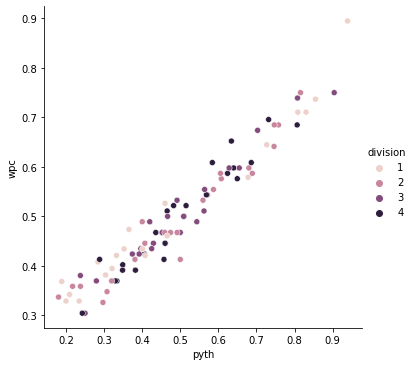

In [82]:
sns.relplot(x='pyth', y='wpc', data=engl_summary, hue='division')

# Regression

In [84]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=engl_summary).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1265.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           8.87e-55
Time:                        11:58:55   Log-Likelihood:                 187.39
No. Observations:                  92   AIC:                            -370.8
Df Residuals:                      90   BIC:                            -365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1803      0.010     18.804      0.000       0.161       0.199
pyth           0.6502      0.018     35.561      0.000       0.614       0.687
==============================================================================
Omnibus:                        3.561   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.898
Skew:                           0.327   Prob(JB):                        0.235
Kurtosis:                       3.574   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Questions

Can we use Pythagorean Expectation to predict the outcome of a game?

# Quiz

How many EPL games were played in 2018 (from 2017-18 season)

In [18]:
(engl_17
# .head()
 .query("Date.str.startswith('2018')")
 .query("division == 1")
 .shape
)

(171, 11)

Which team scored the highest number of goals while playing at home in the first half of the season?

(division 1?)

In [34]:
engl_17.head()

,Date,Season,home,visitor,hgoal,vgoal,division,result,hwin,awin,count
194040,2017-08-04,2017,Nottingham Forest,Millwall,1,0,2,H,1.000,0.000,1
194041,2017-08-04,2017,Sunderland,Derby County,1,1,2,D,0.500,0.500,1
194042,2017-08-05,2017,Aston Villa,Hull City,1,1,2,D,0.500,0.500,1
194043,2017-08-05,2017,Bristol City,Barnsley,3,1,2,H,1.000,0.000,1
194044,2017-08-05,2017,Burton Albion,Cardiff City,0,1,2,A,0.000,1.000,1


In [33]:
(
    engl_17.assign(
        half=lambda x: np.where(
            x["Date"].str.startswith("2017"),
            2017,
            np.where(x["Date"].str.startswith("2018"), 2018, 999),
        )
    )
    .query("division == 1")
    .query("half == 2017")
    .groupby('home')
    .agg({'hgoal': np.sum})
#     ['hgoal'].sum()
    .sort_values('hgoal', ascending=False)
#     .groupby('half')
)

,hgoal
home,
Manchester City,36
Arsenal,25
Manchester United,24
Liverpool,21
Tottenham Hotspur,21
Chelsea,21
Everton,17
Watford,14
AFC Bournemouth,14


Which team conceded the highest number of goals while playing away in the first half of the season?

In [35]:
(
    engl_17.assign(
        half=lambda x: np.where(
            x["Date"].str.startswith("2017"),
            2017,
            np.where(x["Date"].str.startswith("2018"), 2018, 999),
        )
    )
    .query("division == 1")
    .query("half == 2017")
    .groupby('visitor')
    .agg({'hgoal': np.sum})
    .sort_values('hgoal', ascending=False)
)

,hgoal
visitor,
Stoke City,27
West Ham United,24
Huddersfield Town,20
Liverpool,20
Everton,19
Leicester City,18
Swansea City,17
Newcastle United,17
Arsenal,16


Which of the following teams had the smallest difference between their win percentage and Pythagorean expectation in the first half of the season?

In [42]:
engl_home_half = (
    engl_17.assign(
        half=lambda x: np.where(
            x["Date"].str.startswith("2017"),
            2017,
            np.where(x["Date"].str.startswith("2018"), 2018, 999),
        )
    )
    .groupby(["half", "home", "division"])["count", "hwin", "hgoal", "vgoal"]
    .sum()
    .reset_index()
    .rename(
        columns={
            "home": "team",
            "count": "Ph",
            "hgoal": "FTHGh",
            "vgoal": "FTAGh",
#             'hwin': 'hwinvalue'
        }
    )
)
engl_home_half

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,half,team,division,Ph,hwin,FTHGh,FTAGh
0,2017,AFC Bournemouth,1,11,4.500,14,17
1,2017,AFC Wimbledon,3,12,4.500,11,17
2,2017,Accrington,4,11,7.000,19,12
3,2017,Arsenal,1,10,8.500,25,10
4,2017,Aston Villa,2,12,8.500,17,10
5,2017,Barnet,4,12,4.500,10,14
6,2017,Barnsley,2,13,5.000,12,17
7,2017,Birmingham City,2,13,6.000,8,13
8,2017,Blackburn Rovers,3,12,8.500,22,11
9,2017,Blackpool,3,13,6.500,20,21


In [43]:
engl_away_half = (
    engl_17.assign(
        half=lambda x: np.where(
            x["Date"].str.startswith("2017"),
            2017,
            np.where(x["Date"].str.startswith("2018"), 2018, 999),
        )
    )
    .groupby(["half", "visitor"])["count", "awin", "hgoal", "vgoal"]
    .sum()
    .reset_index()
    .rename(
        columns={
            "visitor": "team",
            "count": "Pa",
            "hgoal": "FTHGa",
            "vgoal": "FTAGa",
        }
    )
)
engl_away_half

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,half,team,Pa,awin,FTHGa,FTAGa
0,2017,AFC Bournemouth,10,3.000,15,6
1,2017,AFC Wimbledon,12,4.500,14,9
2,2017,Accrington,13,7.000,18,19
3,2017,Arsenal,11,5.000,16,13
4,2017,Aston Villa,13,6.500,14,16
5,2017,Barnet,13,3.000,23,15
6,2017,Barnsley,12,4.000,20,14
7,2017,Birmingham City,12,1.500,22,5
8,2017,Blackburn Rovers,12,8.500,11,22
9,2017,Blackpool,12,4.500,15,12


In [45]:
# GF - goals scores
# GA - goals conceded

engl_summary_half = (
    engl_home_half.merge(engl_away_half, on=["team", "half"])
    .query("division == 1")
    .assign(
        W=lambda x: x["hwin"] + x["awin"],
        G=lambda x: x["Ph"] + x["Pa"],
        GF=lambda x: x["FTHGh"] + x["FTAGa"],
        GA=lambda x: x["FTAGh"] + x["FTHGa"],
    )
    .assign(
        wpc=lambda x: x["W"] / x["G"],
        pyth=lambda x: x["GF"] ** 2 / (x["GF"] ** 2 + x["GA"] ** 2),
    )
)
engl_summary_half

,half,team,division,Ph,hwin,FTHGh,FTAGh,Pa,awin,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,2017,AFC Bournemouth,1,11,4.500,14,17,10,3.000,15,6,7.500,21,20,32,0.357,0.281
3,2017,Arsenal,1,10,8.500,25,10,11,5.000,16,13,13.500,21,38,26,0.643,0.681
13,2017,Brighton & Hove Albion,1,10,5.500,10,12,11,3.000,13,5,8.500,21,15,25,0.405,0.265
16,2017,Burnley,1,10,6.000,7,6,11,6.500,11,11,12.500,21,18,17,0.595,0.529
23,2017,Chelsea,1,11,8.500,21,7,10,7.000,7,18,15.500,21,39,14,0.738,0.886
30,2017,Crystal Palace,1,11,5.000,14,18,10,2.500,14,4,7.500,21,18,32,0.357,0.240
33,2017,Everton,1,10,6.500,17,13,11,3.500,19,8,10.000,21,25,32,0.476,0.379
40,2017,Huddersfield Town,1,11,6.000,10,12,10,3.000,20,8,9.000,21,18,32,0.429,0.240
44,2017,Leicester City,1,10,5.000,13,14,11,5.000,18,18,10.000,21,31,32,0.476,0.484
46,2017,Liverpool,1,11,8.500,21,4,10,6.500,20,27,15.000,21,48,24,0.714,0.800


In [ ]:
engl_summary_half.query("half == 2017").assign(
    delta=lambda x: abs(x["pyth"] - x["wpc"])
).sort_values("delta")

In [52]:
(engl_summary_half.query("half == 2018").assign(
    delta=lambda x: abs(x["hwin"] - x["awin"])
).sort_values("delta"))

,half,team,division,Ph,hwin,FTHGh,FTAGh,Pa,awin,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth,delta
115,2018,Chelsea,1,8,4.500,9,9,9,4.500,15,14,9.000,17,23,24,0.529,0.479,0.000
122,2018,Crystal Palace,1,8,4.500,15,9,9,4.500,14,12,9.000,17,27,23,0.529,0.579,0.000
132,2018,Huddersfield Town,1,8,2.500,6,13,9,2.500,13,4,5.000,17,10,26,0.294,0.129,0.000
171,2018,Stoke City,1,9,2.500,7,11,8,3.000,11,5,5.500,17,12,22,0.324,0.229,0.500
108,2018,Burnley,1,9,3.500,9,11,8,4.000,11,9,7.500,17,18,22,0.441,0.401,0.500
178,2018,West Bromwich Albion,1,8,3.000,11,14,9,2.500,14,5,5.500,17,16,28,0.324,0.246,0.500
92,2018,AFC Bournemouth,1,8,5.000,12,13,9,4.000,16,13,9.000,17,25,29,0.529,0.426,1.000
175,2018,Tottenham Hotspur,1,9,7.500,19,8,9,6.500,8,16,14.000,18,35,16,0.778,0.827,1.000
140,2018,Manchester City,1,9,7.500,25,7,8,6.500,8,20,14.000,17,45,15,0.824,0.900,1.000
168,2018,Southampton,1,8,2.500,7,11,9,4.000,15,10,6.500,17,17,26,0.382,0.299,1.500


In [60]:
cols = ['team', 'wpc', 'pyth']
(engl_summary_half.query("half == 2017")[cols]
.merge(engl_summary_half.query("half == 2018")[cols],
      on=["team"], suffixes=["_1", "_2"])
.corr())

,wpc_1,pyth_1,wpc_2,pyth_2
wpc_1,1.000,0.968,0.757,0.746
pyth_1,0.968,1.000,0.796,0.795
wpc_2,0.757,0.796,1.000,0.956
pyth_2,0.746,0.795,0.956,1.000
